# 6일차 - 머신러닝

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
data = iris.iloc[:, :4].values
data.shape

(150, 4)

### 로지스틱회귀 적용
- 해결하고 싶은 문제가 무엇인가?
- 다른 말로, 무엇을 **예측**하고 싶은가?
- 문제를 정의하면 X, y 를 쓸 수 있다
> SepalLength, SepalWidth 를 가지고, Setosa(0)/Versicolor(1) 두 품종을 구분하고 싶다!

In [5]:
X = data[:100, :2]
X.shape

(100, 2)

In [8]:
y = np.array([0]*50 + [1]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression() # 로지스틱회귀를 불러온다
model.fit(X, y) # X, y 를 가지고 훈련한다

LogisticRegression()

In [16]:
w = model.coef_[0]      # 가중치값
b = model.intercept_[0] # 절편값

display(w,b)

array([ 3.09621805, -3.01680617])

-7.429143647320671

In [12]:
model.score(X, y)

1.0

In [13]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
model.predict_proba(X)

array([[0.90000258, 0.09999742],
       [0.78719399, 0.21280601],
       [0.92626608, 0.07373392],
       [0.92680661, 0.07319339],
       [0.94313641, 0.05686359],
       [0.92237843, 0.07762157],
       [0.96904215, 0.03095785],
       [0.900715  , 0.099285  ],
       [0.92787673, 0.07212327],
       [0.83338005, 0.16661995],
       [0.86666052, 0.13333948],
       [0.94398221, 0.05601779],
       [0.83447983, 0.16552017],
       [0.95952775, 0.04047225],
       [0.82321799, 0.17678201],
       [0.95498277, 0.04501723],
       [0.92237843, 0.07762157],
       [0.90000258, 0.09999742],
       [0.77635748, 0.22364252],
       [0.95698731, 0.04301269],
       [0.72446268, 0.27553732],
       [0.94270902, 0.05729098],
       [0.98282612, 0.01717388],
       [0.83116297, 0.16883703],
       [0.94398221, 0.05601779],
       [0.73075803, 0.26924197],
       [0.900715  , 0.099285  ],
       [0.86848523, 0.13151477],
       [0.83004564, 0.16995436],
       [0.92626608, 0.07373392],
       [0.

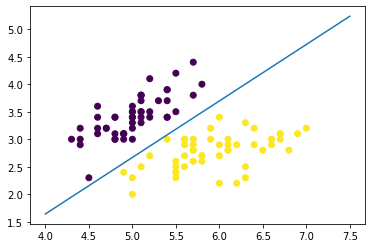

In [17]:
v = np.array([4, 7.5])
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(v, -(w[0]*v+b)/w[1])

### k-NN
- 가까운 이웃으로 판단하는 분류 알고리즘
- SepalLength, SepalWidth 두개의 속성을 이용해, 품종 세개를 구분하고 싶다

In [18]:
X = data[:, :2]
X.shape

(150, 2)

In [19]:
y = np.array([0]*50 + [1]*50 + [2]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier() # k-NN 모델을 불러온다
model.fit(X, y) # X, y 를 가지고 훈련한다

KNeighborsClassifier()

In [23]:
model.score(X, y)

0.8333333333333334

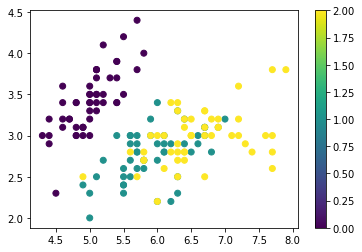

In [24]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [25]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

In [27]:
! pip install mglearn

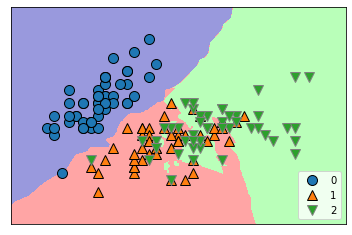

In [29]:
import mglearn

mglearn.plots.plot_2d_classification(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(loc=4)

In [30]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer ne

In [33]:
model = KNeighborsClassifier(10) # 3명의 친구를 봐서 판단한다
model.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

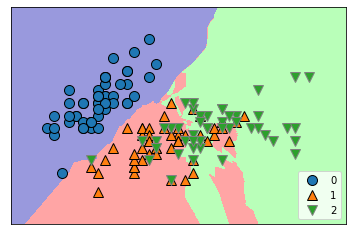

In [34]:
mglearn.plots.plot_2d_classification(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(loc=4)

In [35]:
model.score(X, y)

0.8466666666666667

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [39]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [40]:
model = KNeighborsClassifier(5) # 5명의 친구를 봐서 판단한다
model.fit(X_train, y_train)

KNeighborsClassifier()

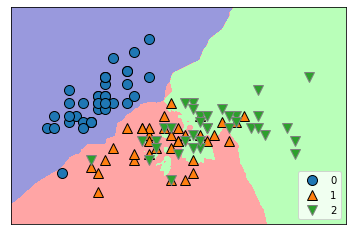

In [41]:
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.legend(loc=4)

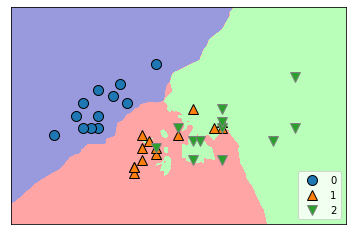

In [42]:
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.legend(loc=4)

In [43]:
model.score(X_test, y_test)

0.7631578947368421

In [44]:
model.score(X_train, y_train)

0.8214285714285714

In [45]:
model.predict(X_test)

array([0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1])

In [46]:
y_test

array([0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0,
       1, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2])